In [57]:
import mlrose_hiive
import numpy as np
import time
import matplotlib.pyplot as plt

Problem Types

- Solve discrete-value (bit-string and integer-string), continuous-value and tour optimization (travelling salesperson) problems;
- Define your own fitness function for optimization or use a pre-defined function.
- Pre-defined fitness functions exist for solving the: One Max, Flip Flop, Four Peaks, Six Peaks, Continuous Peaks, Knapsack, Travelling Salesperson, N-Queens and Max-K Color optimization problems.

Please note that the problems you create should be over discrete-valued parameter spaces. Bit strings are preferable.

Three problem types:
1. Flip Flops
2. Four Peaks
3. Knapsack


Four Optimization Algorithms:
1. randomized hill climbing (RHC)
2. simulated annealing (SA)
3. a genetic algorithm (GA)
4. MIMIC


## 1. Flip Flops

In [97]:
size = 100
fitness = mlrose_hiive.FlipFlop()
problem = mlrose_hiive.DiscreteOpt(length = size, fitness_fn = fitness, maximize = True, max_val = 2)
problem.set_mimic_fast_mode(True)
init_state = np.random.randint(2, size = size)

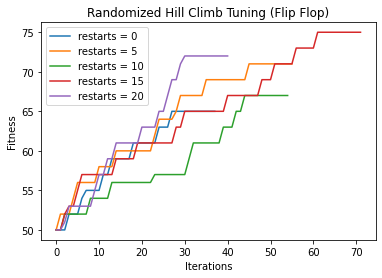

In [114]:
# hyper-param tuning
# RHC
## restarts
fc_rhc_restarts = []
plt.figure()
for i in range(0, 25, 5):
    _, _, fitness_curve_rhc = mlrose_hiive.random_hill_climb(problem, restarts = i, max_attempts = 10, max_iters = 2000, init_state = init_state, curve = True)
    plt.plot(fitness_curve_rhc[:,0], label = f'restarts = {i}')

plt.title('Randomized Hill Climb Tuning (Flip Flop)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig('flip_flop_rhc.png')

# restarts = 15

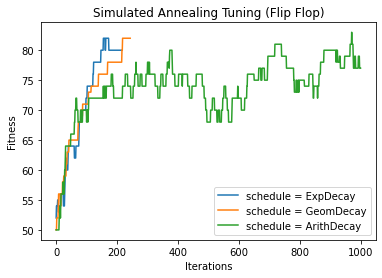

In [115]:
# SA
_, _, fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 10, max_iters = 1000, init_state = init_state, curve = True)
plt.plot(fitness_curve_sa[:,0], label = 'schedule = ExpDecay')
_, _, fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.GeomDecay(), max_attempts = 10, max_iters = 1000, init_state = init_state, curve = True)
plt.plot(fitness_curve_sa[:,0], label = 'schedule = GeomDecay')
_, _, fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ArithDecay(), max_attempts = 10, max_iters = 1000, init_state = init_state, curve = True)
plt.plot(fitness_curve_sa[:,0], label = 'schedule = ArithDecay')


plt.title('Simulated Annealing Tuning (Flip Flop)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig('flip_flop_sa.png')

# GeomDecay or ExpDecay


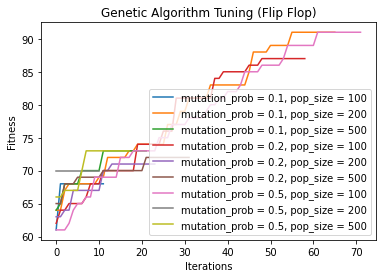

In [116]:
for mutation_prob in [0.1, 0.2, 0.5]:
    for pop_size in [100, 200, 500]:
        _, _, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, mutation_prob = mutation_prob, pop_size = pop_size, max_attempts = 10, curve = True)
        plt.plot(fitness_curve_ga[:,0], label = f'mutation_prob = {mutation_prob}, pop_size = {pop_size}')

plt.title('Genetic Algorithm Tuning (Flip Flop)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig('flip_flop_ga.png')

# mutation_prob = 0.1, pop_size = 200

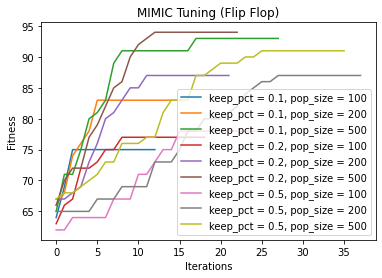

In [118]:
for keep_pct in [0.1, 0.2, 0.5]:
    for pop_size in [100, 200, 500]:
        _, _, fitness_curve_mimic = mlrose_hiive.mimic(problem, keep_pct = keep_pct, pop_size = pop_size, max_attempts = 10, curve = True)
        plt.plot(fitness_curve_mimic[:,0], label = f'keep_pct = {keep_pct}, pop_size = {pop_size}')

plt.title('MIMIC Tuning (Flip Flop)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.savefig('flip_flop_mimic.png')

# keep_pct = 0.2, pop_size = 500

In [119]:
%%time
time_dict = {}
best_fitness_dict = {}
size_range = range(10, 200, 10)
for size in size_range:
    print("Problem size: ", size)
    # RHC
    np.random.seed(1234)
    init_state = np.random.randint(2, size = size)
    fitness = mlrose_hiive.FlipFlop()
    problem = mlrose_hiive.DiscreteOpt(length = size, fitness_fn = fitness, maximize = True, max_val = 2)
    start = time.time()
    best_state_rhc, best_fitness_rhc, fitness_curve_rhc = mlrose_hiive.random_hill_climb(problem, 
                                                            max_attempts = 10, 
                                                            restarts = 15,
                                                            max_iters = 2000, 
                                                            init_state = init_state, 
                                                            curve = True, 
                                                            random_state=123)
    end = time.time()
    rhc_time = end - start
    
    # Add value to dictionary
    time_list = time_dict.get('RHC', [])
    time_list.append(rhc_time)
    time_dict['RHC'] = time_list
    
    fit_list = best_fitness_dict.get('RHC', [])
    fit_list.append(best_fitness_rhc)
    best_fitness_dict['RHC'] = fit_list
    
    
    # SA
    start = time.time()
    best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, 
                                                                                        schedule = mlrose_hiive.GeomDecay(), 
                                                                                        max_attempts = 10, 
                                                                                        max_iters = 2000, 
                                                                                        init_state = init_state, 
                                                                                        curve = True)
    end = time.time()
    sa_time = end - start
    
    # Add value to dictionary
    time_list = time_dict.get('SA', [])
    time_list.append(sa_time)
    time_dict['SA'] = time_list
    
    fit_list = best_fitness_dict.get('SA', [])
    fit_list.append(best_fitness_sa)
    best_fitness_dict['SA'] = fit_list
    
    
    # GA
    start = time.time()
    best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, 
                                                                                mutation_prob = 0.1,
                                                                                pop_size = 200,
                                                                                max_attempts = 10, 
                                                                                curve = True)
    end = time.time()
    ga_time = end - start
    
    # Add value to dictionary
    time_list = time_dict.get('GA', [])
    time_list.append(ga_time)
    time_dict['GA'] = time_list
    
    fit_list = best_fitness_dict.get('GA', [])
    fit_list.append(best_fitness_ga)
    best_fitness_dict['GA'] = fit_list
    
    #MIMIC
    start = time.time()
    best_state_mimic, best_fitness_mimic, fitness_curve_mimic = mlrose_hiive.mimic(problem, 
                                                                                   keep_pct = 0.2,
                                                                                   pop_size = 500, 
                                                                                   max_attempts = 10, 
                                                                                   curve = True)
    end = time.time()
    mimic_time = end - start
    
    # Add value to dictionary
    time_list = time_dict.get('MIMIC', [])
    time_list.append(mimic_time)
    time_dict['MIMIC'] = time_list
    
    fit_list = best_fitness_dict.get('MIMIC', [])
    fit_list.append(best_fitness_mimic)
    best_fitness_dict['MIMIC'] = fit_list
    

Problem size:  10
Problem size:  20
Problem size:  30
Problem size:  40
Problem size:  50
Problem size:  60
Problem size:  70
Problem size:  80
Problem size:  90
Problem size:  100
Problem size:  110
Problem size:  120
Problem size:  130
Problem size:  140
Problem size:  150
Problem size:  160
Problem size:  170
Problem size:  180
Problem size:  190
CPU times: user 27min 48s, sys: 5.17 s, total: 27min 53s
Wall time: 1h 26min 48s


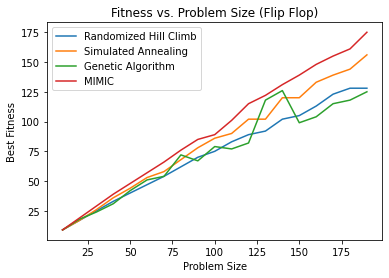

In [143]:
plt.plot(size_range, best_fitness_dict['RHC'], label = 'Randomized Hill Climb')
plt.plot(size_range, best_fitness_dict['SA'], label = 'Simulated Annealing')
plt.plot(size_range, best_fitness_dict['GA'], label = 'Genetic Algorithm')
plt.plot(size_range, best_fitness_dict['MIMIC'], label = 'MIMIC')
plt.legend()
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('Fitness vs. Problem Size (Flip Flop)')
plt.show()

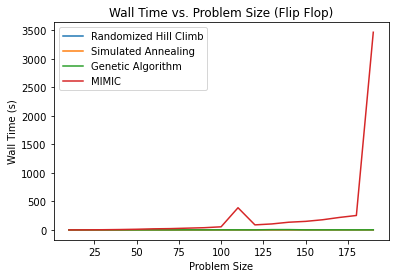

In [122]:
plt.figure()
plt.plot(size_range, time_dict['RHC'], label = 'Randomized Hill Climb')
plt.plot(size_range, time_dict['SA'], label = 'Simulated Annealing')
plt.plot(size_range, time_dict['GA'], label = 'Genetic Algorithm')
plt.plot(size_range, time_dict['MIMIC'], label = 'MIMIC')
plt.title('Wall Time vs. Problem Size (Flip Flop)')
plt.legend()
plt.xlabel('Problem Size')
plt.ylabel('Wall Time (s)')
plt.savefig('flip_flop_time.png')

In [123]:
best_size_rhc = size_range[np.argmax(best_fitness_dict['RHC'])]
best_size_sa = size_range[np.argmax(best_fitness_dict['SA'])]
best_size_ga = size_range[np.argmax(best_fitness_dict['GA'])]
best_size_mimic = size_range[np.argmax(best_fitness_dict['MIMIC'])]
print(best_size_rhc, best_size_sa, best_size_ga, best_size_mimic)

180 190 140 190


In [128]:
# iteration plot using using the best problem size for each algorithm

problem_size = 200

fitness = mlrose_hiive.FlipFlop()
problem.set_mimic_fast_mode(True)

start=time.time()
problem = mlrose_hiive.DiscreteOpt(length = problem_size, fitness_fn = fitness, maximize = True, max_val = 2)
init_state = np.random.randint(2, size = problem_size)
_, _, fitness_curve_rhc = mlrose_hiive.random_hill_climb(problem, max_attempts = 10, max_iters = 1000, init_state = init_state, curve = True)
end = time.time()
print('RHC: ', end-start, 's')
print("Done with RHC iterations!")

start=time.time()
problem = mlrose_hiive.DiscreteOpt(length = problem_size, fitness_fn = fitness, maximize = True, max_val = 2)
init_state = np.random.randint(2, size = problem_size)
_, _, fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 10, max_iters=1000,init_state = init_state, curve = True)
end = time.time()
print('SA: ', end-start, 's')
print("Done with SA iterations!")

start=time.time()
problem = mlrose_hiive.DiscreteOpt(length = problem_size, fitness_fn = fitness, maximize = True, max_val = 2)
init_state = np.random.randint(2, size = problem_size)
_, _, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, max_attempts = 10, max_iters=1000,curve = True)
end = time.time()
print('GA: ', end-start, 's')
print("Done with GA iterations!")

start=time.time()
problem = mlrose_hiive.DiscreteOpt(length = problem_size, fitness_fn = fitness, maximize = True, max_val = 2)
init_state = np.random.randint(2, size = problem_size)
_, _, fitness_curve_mimic = mlrose_hiive.mimic(problem, pop_size = 200, max_attempts = 10, max_iters=1000,curve = True)
end = time.time()
print('MIMIC: ', end-start, 's')
print("Done with MIMIC iterations!")

RHC:  0.03069281578063965 s
Done with RHC iterations!
SA:  0.34108614921569824 s
Done with SA iterations!
SA:  1.2980060577392578 s
Done with GA iterations!
SA:  250.49115705490112 s
Done with MIMIC iterations!


Text(0, 0.5, 'Fitness')

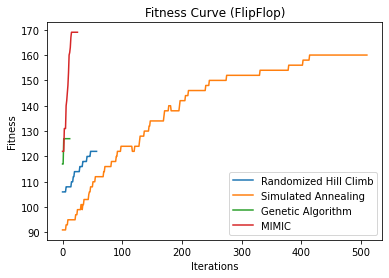

In [129]:
plt.figure()
plt.plot(fitness_curve_rhc[:,0], label = 'Randomized Hill Climb')
plt.plot(fitness_curve_sa[:,0], label = 'Simulated Annealing')
plt.plot(fitness_curve_ga[:,0], label = 'Genetic Algorithm')
plt.plot(fitness_curve_mimic[:,0], label = 'MIMIC')
plt.title('Fitness Curve (FlipFlop)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [130]:
run_time = {}
run_time['RHC'] = 0.03
run_time['SA'] = 0.34
run_time['GA'] = 1.30
run_time['MIMIC'] = 250.49

Text(0.5, 1.0, 'Time Comparison (Flip Flop)')

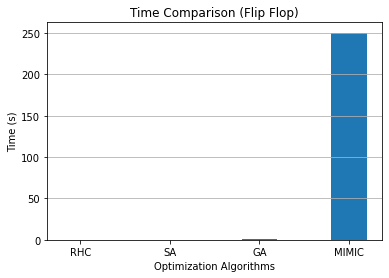

In [142]:
plt.bar(run_time.keys(), run_time.values(), width=0.4)
plt.grid(axis='y')
plt.ylabel('Time (s)')
plt.xlabel('Optimization Algorithms')
plt.title('Time Comparison (Flip Flop)')